# **Diabetes Risk Classification Tool**



# **Abstract**

This project aims to develop a supervised machine learning model to predict the likelihood of diabetes among adults in the United States using data from the Centers for Disease Control and Prevention’s Behavioral Risk Factor Surveillance System (BRFSS). The dataset contains over 400,000 records and includes a variety of demographic, behavioral, and physiological health indicators such as body mass index (BMI), age, physical activity, smoking status, income, and general health condition.

The analysis begins with data exploration to assess data quality, distribution, and class balance, followed by data cleaning and feature engineering steps to prepare the dataset for modeling. Lastly classification algorithms are compared using evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

The results highlight which features contribute most to diabetes risk and identify the model that offers the most accurate and reliable predictions. This study demonstrates the potential of data-driven approaches in public health analytics and provides insights that could assist in early detection and targeted prevention strategies for diabetes.

## **Dataset Overview**

- **Name:** CDC Behavioral Risk Factor Surveillance System (BRFSS)
- **Source:** (https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system/data?select=2015.csv)
- **Description:** The BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
- **Records:** ~400,000–500,000
- **Data type:** Tabular, Multivariate
- **Target Variable:** DIABETE3 (Diabetes status)

- **Features:**
  - DIABETE3 - Ever told you have diabetes
  - _BMI5CAT –Four-categories of Body Mass Index (BMI)
  - AGEG5YR – Age group
  - SEX – Gender
  - EXERANY2 – Exercise (Physical Activity)
  - _SMOKER3 – Computed Smoking Status (Smoking frequency)
  - GENHLTH – Health Status
  - BPMEDS – Currently Taking Blood Pressure Medication
  - TOLDHI2 – Ever Told Blood Cholesterol High
  - CHOLCHK – How Long since Cholesterol Checked
  - _RFHYPE5 – Told high blood pressure
  - PHYSHLTH – Number of Days Physical Health Not Good
  - _RFDRHV5 – Heavy Alcohol Consumption

# **Data Loading**

The purpose of this section is to import the dataset and necessary Python libraries required for data analysis and machine learning. This step initializes the project workflow by ensuring that all tools for data manipulation, visualization, and modeling are properly loaded.

Using the KaggleHub API, the CDC Behavioral Risk Factor Surveillance System (BRFSS) dataset is downloaded directly from Kaggle. After downloading, the dataset files are listed to confirm successful access, and one CSV file (in this case, 2015.csv) is loaded into a Pandas DataFrame.

This step allows us to:

Verify that the dataset loads correctly without errors.

Inspect its structure using .shape (to check the number of rows and columns).

Preview the first few records using .head() to confirm the presence of relevant features and data types.

In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("cdc/behavioral-risk-factor-surveillance-system")

print("Path to dataset files:", path)

100%|██████████| 414M/414M [00:05<00:00, 77.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cdc/behavioral-risk-factor-surveillance-system/versions/1


In [2]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# List files in dataset
print(os.listdir(path))

# load CSV file
df = pd.read_csv(path + "/2015.csv")
print(df.shape)
df.head()


['2011.csv', '2015.csv', '2012.csv', '2015_formats.json', '2013.csv', '2014.csv']
(441456, 330)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


## **Initial Data Analysis**

The purpose of the initial data analysis is to gain an overall understanding of the dataset’s structure, quality, and key characteristics before applying any machine learning models. This step helps identify patterns, trends, and potential issues such as missing values, outliers, or imbalanced classes.


***Inspect Dataset Structure***

In [3]:

# Get basic information about the dataset
info = df.info()
info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


***Identify data types***

In [4]:
print(df.dtypes)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("\n Numerical Columns:", num_cols)
print("\n Categorical Columns:", cat_cols)
print("\n Boolean Columns:", bool_cols)
print("\n Datetime Columns:", datetime_cols)

_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
             ...   
_RFSEAT2    float64
_RFSEAT3    float64
_FLSHOT6    float64
_PNEUMO2    float64
_AIDTST3    float64
Length: 330, dtype: object

 Numerical Columns: ['_STATE', 'FMONTH', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'QLACTLM2', 'USEEQ

The dataset contains a large number of variables (330 total columns) representing a broad range of health, lifestyle, and demographic factors collected from participants across the U.S.

Numerical Columns:
There are over 320 numerical variables. Most of are coded responses to health survey questions such as chronic diseases (diabetes, hypertension, asthma), lifestyle habits (smoking, exercise, alcohol consumption), and demographic characteristics (age, income, education).

Categorical Columns:
There are 7 categorical variables, such as IDATE, IMONTH, and IDAY, which represent date-related survey metadata or categorical response fields that were not numerically encoded.

Boolean Columns:
None of the columns were identified as boolean; however, several binary numeric variables (0/1) represent yes/no responses and can effectively serve as boolean indicators.

Datetime Columns:
No explicit datetime columns were found, though IDATE, IMONTH, and IYEAR could be combined to construct a full timestamp for temporal analyses if needed.

In [5]:
df.describe()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,254645.000000,45.0,254643.0,254646.000000,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,1115.040457,2.015005e+09,2.015005e+09,1.0,1.000177,1.0,1.0,1.545133,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,35.746794,4.113443e+03,4.113443e+03,0.0,0.013292,0.0,0.0,0.497960,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


***Identify Missing Values***


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
_STATE,0
FMONTH,0
IDATE,0
IMONTH,0
IDAY,0
...,...
_RFSEAT2,0
_RFSEAT3,0
_FLSHOT6,283502
_PNEUMO2,283502


***Detect Duplicate Rows***



In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

# **Data Cleaning**

The purpose of this code notebook is to clean BRFSS data into a usable format for machine learning algorithms. The dataset originally contains 330 features (columns), but based on diabetes research and factors influencing the development and management of diabetes and related chronic health conditions, only selected features are included in this analysis.

The purpose of data cleaning in this project is to ensure that the data is accurate, consistent, and suitable for analysis by handling missing values, fixing errors, standardizing formats, and removing irrelevant or duplicate entries.

***Keep only selected features***

In [8]:
print("Data Cleaning for BRFSS Diabetes Analysis")
print("-" * 70)

# Diabetes related features
features = [
    'DIABETE3','_BMI5CAT','_AGEG5YR','SEX','EXERANY2','_SMOKER3',
    'GENHLTH','BPMEDS',
    'TOLDHI2','CHOLCHK','_RFHYPE5','PHYSHLTH','_RFDRHV5'
]

# Filter the DataFrame to include only needed features
df = df[[col for col in features if col in df.columns]]

print(f"Initial shape after feature selection: {df.shape}")
print(f"Number of features retained: {len(df.columns)}")
print("Selected Features:")
for col in df.columns:
    print(col)


Data Cleaning for BRFSS Diabetes Analysis
----------------------------------------------------------------------
Initial shape after feature selection: (441456, 13)
Number of features retained: 13
Selected Features:
DIABETE3
_BMI5CAT
_AGEG5YR
SEX
EXERANY2
_SMOKER3
GENHLTH
BPMEDS
TOLDHI2
CHOLCHK
_RFHYPE5
PHYSHLTH
_RFDRHV5


Each selected feature has a direct or scientifically supported relationship with diabetes development, diagnosis, or management. Removes unrelated or redundant variables, improving model interpretability and performance.
Ensures the model learns from clinically meaningful predictors rather than noise.

***Handle Missing and null values***

In [9]:
print("\n Missing Values Before Cleaning:")
print(df.isnull().sum())

# Drop columns with >40% missing values
threshold = 0.4 * len(df)
df = df.dropna(axis=1, thresh=threshold)

# Fill numerical with median, categorical with mode
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("\n Missing Values After Cleaning:", df.isnull().sum().sum(), "remaining total")


 Missing Values Before Cleaning:
DIABETE3         7
_BMI5CAT     36398
_AGEG5YR         0
SEX              0
EXERANY2     35444
_SMOKER3         0
GENHLTH          2
BPMEDS      263268
TOLDHI2      59154
CHOLCHK      59154
_RFHYPE5         0
PHYSHLTH         1
_RFDRHV5         0
dtype: int64

 Missing Values After Cleaning: 0 remaining total


***Identify and Handle Outliers***

In [10]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = data.shape[0]
        data = data[(data[col] >= lower) & (data[col] <= upper)]
        after = data.shape[0]
        removed = before - after
        if removed > 0:
            print(f"{col}: Removed {removed} outliers")
    return data

numeric_features = ['PHYSHLTH']
df = remove_outliers_iqr(df, numeric_features)


***Correct Inconsistent or Erroneous Entries***

In [11]:

# Convert categorical values to lowercase strings and strip spaces
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Standardize binary variables (Yes/No to 1/0)
binary_vars = ['EXERANY2', 'BPMEDS', 'TOLDHI2', 'CHOLCHK', '_RFHYPE5', '_RFDRHV5']
binary_vars = [col for col in binary_vars if col in df.columns]

for col in binary_vars:
    df[col] = df[col].replace({'yes': 1, 'no': 0, '1': 1, '2': 0, 'nan': np.nan})
    df[col] = df[col].astype(float).fillna(df[col].mode()[0])

# Clean health column
if 'GENHLTH' in df.columns:
    df['GENHLTH'] = df['GENHLTH'].replace({7: np.nan, 9: np.nan})  # 7/9 represent 'Don't know/Refused'

 ***Handle Diabetes Target Variable***

In [12]:
if 'DIABETE3' in df.columns:
    df['DIABETE3'] = (
        df['DIABETE3']
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({
            'yes': 1,
            'no': 0,
            'borderline diabetes': 0.5,
            'don’t know/not sure': np.nan,
            'refused': np.nan,
            'nan': np.nan
        })
    )
    df['DIABETE3'] = pd.to_numeric(df['DIABETE3'], errors='coerce').fillna(0)

print("\n Data Cleaning Completed")
print("Final shape:", df.shape)
print("\nPreview of Cleaned Data:")
print(df.head())


 Data Cleaning Completed
Final shape: (441456, 13)

Preview of Cleaned Data:
   DIABETE3  _BMI5CAT  _AGEG5YR  SEX  EXERANY2  _SMOKER3  GENHLTH  BPMEDS  \
0       3.0       4.0       9.0  2.0       2.0       3.0      5.0     1.0   
1       3.0       3.0       7.0  2.0       1.0       1.0      3.0     1.0   
2       3.0       2.0      11.0  2.0       1.0       9.0      4.0     1.0   
3       3.0       3.0       9.0  2.0       2.0       4.0      5.0     1.0   
4       3.0       2.0       9.0  2.0       2.0       4.0      5.0     1.0   

   TOLDHI2  CHOLCHK  _RFHYPE5  PHYSHLTH  _RFDRHV5  
0      1.0      1.0       2.0      15.0       1.0  
1      2.0      4.0       1.0      88.0       1.0  
2      1.0      1.0       1.0      15.0       9.0  
3      1.0      1.0       2.0      30.0       1.0  
4      2.0      1.0       1.0      20.0       1.0  


Cleans and prepares the DIABETE3 column, which represents diabetes status. It converts text responses like “yes,” “no,” and “borderline diabetes” into numeric values (1, 0, and 0.5), and removes inconsistent formatting. It also handles missing or invalid responses by replacing them with NaN or 0. Finally, it ensures the column is numeric and ready for machine learning, confirming the data cleaning process was successful.

***Rename columns to more readable names***

In [13]:
# Rename columns to more readable names
df = df.rename(columns={
    'DIABETE3': 'Diabetes_Status',
    '_BMI5CAT': 'BMI',
    '_AGEG5YR': 'Age',
    'SEX': 'Gender',
    'EXERANY2': 'Physical_Activity',
    '_SMOKER3': 'Smoking_Status',
    'GENHLTH': 'General_Health',
    'BPMEDS': 'On_BP_Medication',
    'TOLDHI2': 'Ever_High_Cholesterol',
    'CHOLCHK': 'Cholesterol_Check_Recency',
    '_RFHYPE5': 'High_BP_Diagnosis',
    'PHYSHLTH': 'Days_Physical_Health_Not_Good',
    '_RFDRHV5': 'Heavy_Alcohol_Consumption'
})

# Review updated dataset
df.head()


,Diabetes_Status,BMI,Age,Gender,Physical_Activity,Smoking_Status,General_Health,On_BP_Medication,Ever_High_Cholesterol,Cholesterol_Check_Recency,High_BP_Diagnosis,Days_Physical_Health_Not_Good,Heavy_Alcohol_Consumption
0,3.0,4.0,9.0,2.0,2.0,3.0,5.0,1.0,1.0,1.0,2.0,15.0,1.0
1,3.0,3.0,7.0,2.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,88.0,1.0
2,3.0,2.0,11.0,2.0,1.0,9.0,4.0,1.0,1.0,1.0,1.0,15.0,9.0
3,3.0,3.0,9.0,2.0,2.0,4.0,5.0,1.0,1.0,1.0,2.0,30.0,1.0
4,3.0,2.0,9.0,2.0,2.0,4.0,5.0,1.0,2.0,1.0,1.0,20.0,1.0


***Recheck missing and duplicate rows***

In [14]:
df.drop_duplicates(inplace=True)

df = df.dropna()
print("Remaining missing values per column:")
print(df.isnull().sum())

Remaining missing values per column:
Diabetes_Status                  0
BMI                              0
Age                              0
Gender                           0
Physical_Activity                0
Smoking_Status                   0
General_Health                   0
On_BP_Medication                 0
Ever_High_Cholesterol            0
Cholesterol_Check_Recency        0
High_BP_Diagnosis                0
Days_Physical_Health_Not_Good    0
Heavy_Alcohol_Consumption        0
dtype: int64


***Save the Cleaned Dataset***

In [15]:
# Save as CSV
df.to_csv("BRFSS_Diabetes_Cleaned.csv", index=False)

print("Cleaned dataset successfully saved!")
print("BRFSS_Diabetes.csv")


Cleaned dataset successfully saved!
BRFSS_Diabetes.csv


# **Visualizations**

## **Distributions & Demographics**

***Age vs Diabetes Rates***



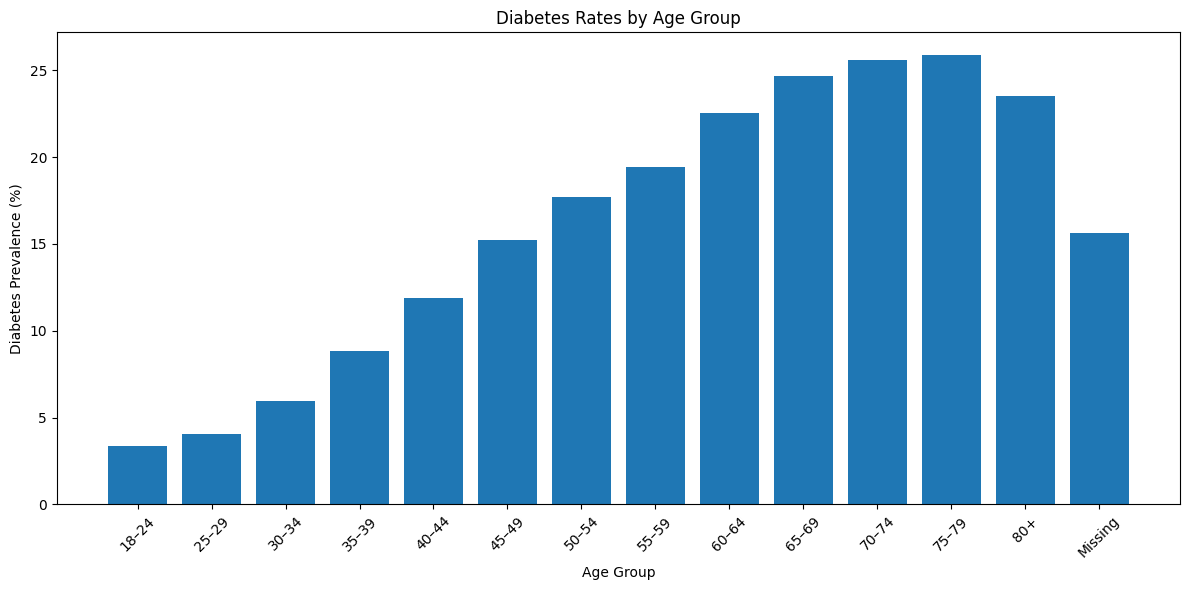

In [16]:
age_labels = {
    1: "18–24",
    2: "25–29",
    3: "30–34",
    4: "35–39",
    5: "40–44",
    6: "45–49",
    7: "50–54",
    8: "55–59",
    9: "60–64",
    10: "65–69",
    11: "70–74",
    12: "75–79",
    13: "80+",
    14: "Missing"
}

# Compute diabetes rates by Age
age_counts = df.groupby('Age')['Diabetes_Status'].apply(lambda x: (x == 1).mean())
age_rates = age_counts * 100

# Replace with labels
age_rates.index = age_rates.index.map(age_labels)

plt.figure(figsize=(12,6))
plt.bar(age_rates.index, age_rates.values)

plt.xlabel("Age Group")
plt.ylabel("Diabetes Prevalence (%)")
plt.title("Diabetes Rates by Age Group")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


When comparing the BRFSS age distribution to diabetes prevalence by age group, a clear age-related trend emerges. Although the dataset has balanced representation across adult groups, the highest weighted proportions fall between ages 50 and 79 (approximately 41% of the population). These same age groups show the highest diabetes prevalence in the visualization (20–26%). Conversely, younger age groups (18–34), which make up a smaller weighted portion of the dataset, show significantly lower diabetes rates (3–9%). This alignment confirms a strong positive correlation between age and diabetes prevalence, consistent with established public health research.

***BMI Category Distribution***


<Figure size 1400x800 with 0 Axes>

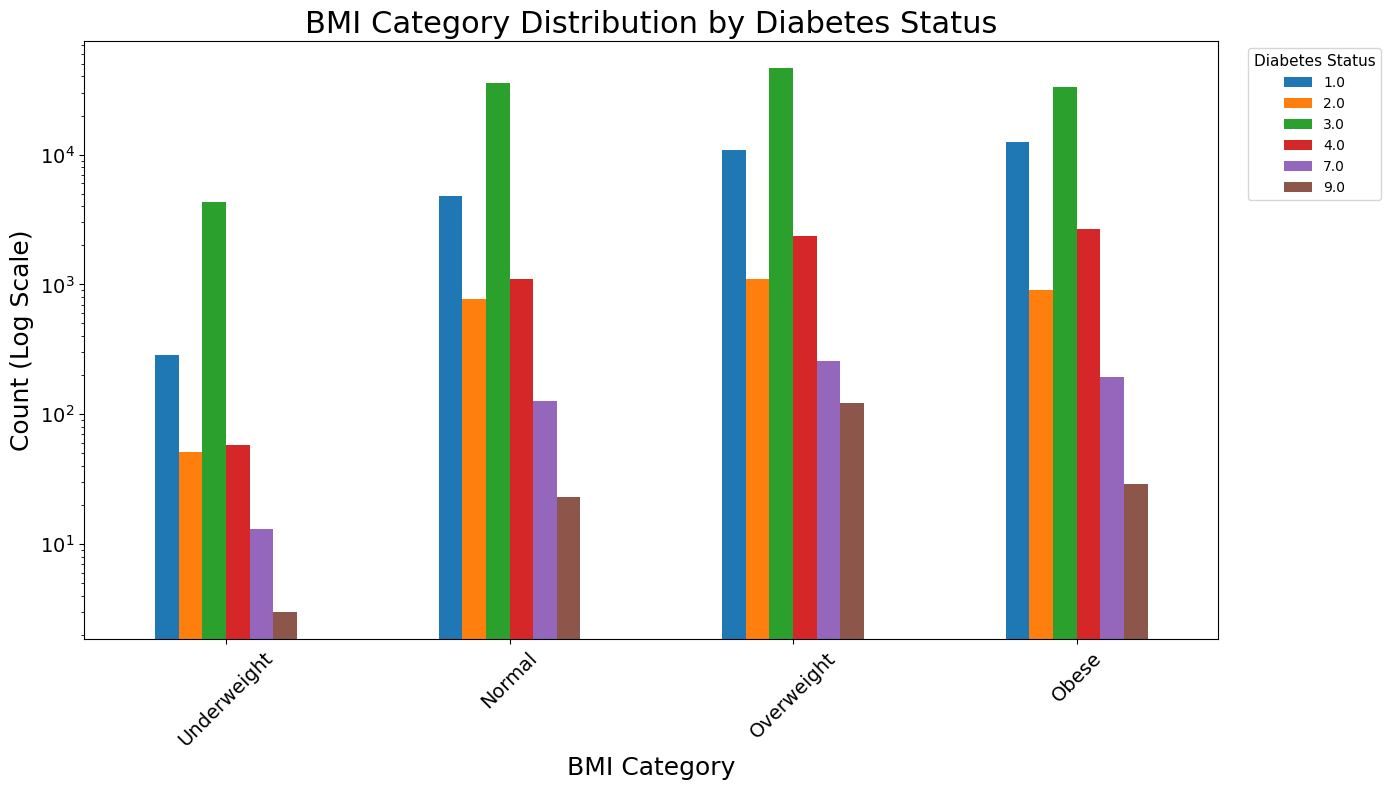

In [17]:
# Map numeric code → value label
bmi_labels = {
    1: "Underweight",
    2: "Normal",
    3: "Overweight",
    4: "Obese"
}

df["BMI_Label"] = df["BMI"].map(bmi_labels)
# Count table
counts = df.groupby(["BMI_Label", "Diabetes_Status"]).size().unstack(fill_value=0)
counts = counts.loc[["Underweight","Normal","Overweight","Obese"]]  # enforce order
plt.figure(figsize=(14,8))
ax = counts.plot(kind="bar", figsize=(14,8))

plt.yscale("log")

plt.title("BMI Category Distribution by Diabetes Status", fontsize=22)
plt.xlabel("BMI Category", fontsize=18)
plt.ylabel("Count (Log Scale)", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.legend(
    title="Diabetes Status",
    fontsize=10,
    title_fontsize=11,
    loc="upper left",
    bbox_to_anchor=(1.02, 1)
)

plt.tight_layout()
plt.show()


***Diabetes Status***
| Value  | Meaning                           |
| ----- | --------------------------------- |
| **1** | Yes (diabetes)                    |
| **2** | Yes, but only during pregnancy    |
| **3** | No                                |
| **4** | Prediabetes / borderline diabetes |
| **7** | Don’t know / Not sure             |
| **9** | Refused                           |

Analysis of BMI category distribution revealed a clear and clinically consistent trend: diabetes prevalence increases steadily with higher BMI groups. Individuals classified as Obese exhibited the highest rates of both diabetes and prediabetes, followed by those in the Overweight group. In contrast, the Normal and Underweight categories showed significantly lower incidence. This pattern reflects well-established metabolic risk factors and reinforces BMI as one of the strongest predictors in the modeling pipeline.

***Gender Differences in Diabetes***


<Figure size 1200x600 with 0 Axes>

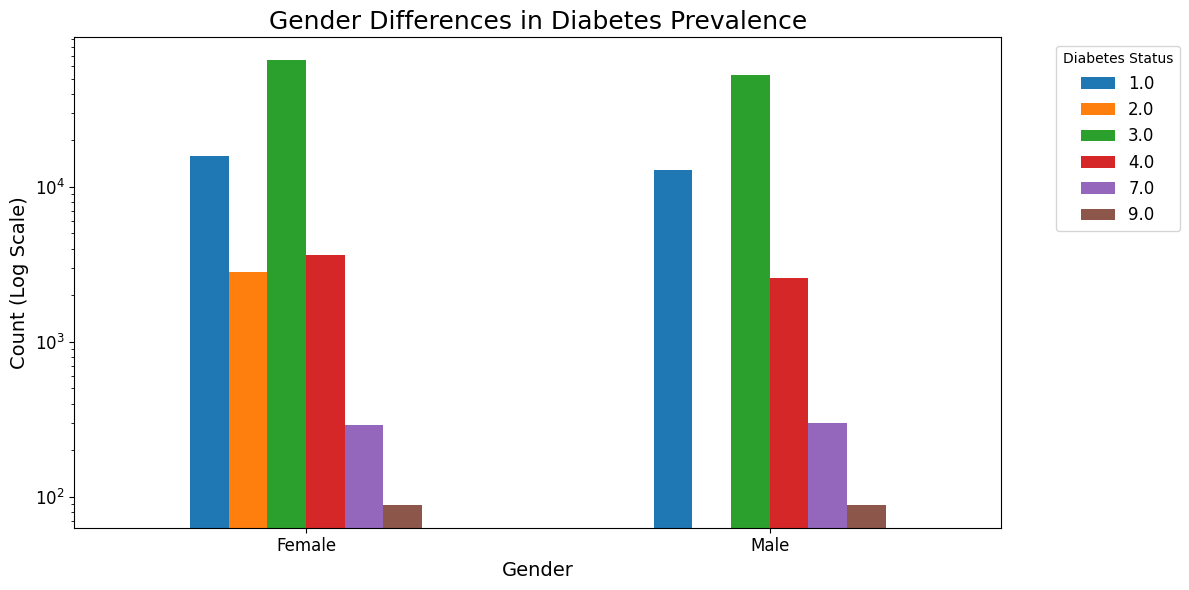

In [18]:
# Map numeric code → value label
gender_map = {1: "Male", 2: "Female"}
df["Gender_Label"] = df["Gender"].map(gender_map)

# Group counts
gender_counts = df.groupby(["Gender_Label", "Diabetes_Status"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
ax = gender_counts.plot(kind="bar", logy=True, figsize=(12,6))

plt.title("Gender Differences in Diabetes Prevalence", fontsize=18)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count (Log Scale)", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Move legend
plt.legend(
    title="Diabetes Status",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12
)

plt.tight_layout()
plt.show()




The comparison of diabetes status across genders indicates that males and females exhibit largely similar distribution patterns, with the majority of respondents falling into the non-diabetic category. Females show a modestly higher number of diagnosed diabetes cases (Status = 1), consistent with population-level findings that women are more likely to engage with healthcare services and receive clinical diagnoses. Prediabetes (Status = 4) is also slightly more prevalent among females. Nonetheless, the overall proportions of diabetes and prediabetes remain comparable between genders, suggesting that gender alone is not a strong predictive factor and should be considered in conjunction with other variables such as BMI, age, and lifestyle-related indicators.


## **Lifestyle & Behavioral Factors**

***Physical Activity vs Diabetes***


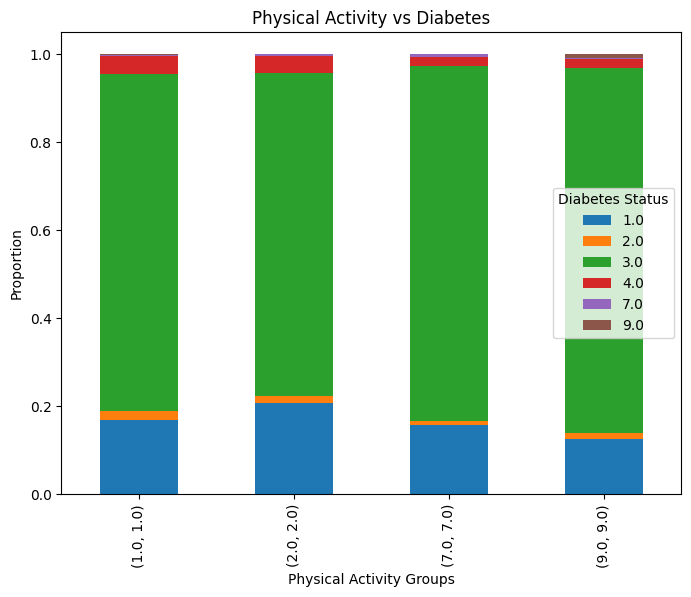

In [19]:
pa = (
    df.groupby(['Physical_Activity','Diabetes_Status'])
      .size()
      .groupby(level=0).apply(lambda x: x / x.sum())
      .unstack()
)

pa.plot(kind="bar", stacked=True, figsize=(8,6))

plt.title("Physical Activity vs Diabetes")
plt.xlabel("Physical Activity Groups")
plt.ylabel("Proportion")
plt.legend(title="Diabetes Status")
plt.show()



| Diabetes Status | Meaning |
| ------------ | ---------------------------------------------------- |
| **1**        | Yes (has diabetes)     |
| **2**        | No (no diabetes)       |
| **3**        | No, told pre-diabetes  |
| **4**        | Yes (gestational)      |
| **7**        | Don't know             |
| **9**        | Refused                |


| Physical Activity Groups | Meaning                                  |
| ------------ | ---------------------------------------------------- |
| **(1,1)**        | Yes — the respondent did physical activity       |
| **(2,2)**        | No — the respondent did NOT do physical activity |
| **(7,7)**        | Don't know / Not sure                            |
| **(9,9)**        | Refused                                          |

The chart illustrates the distribution of diabetes statuses within each physical activity category. A clear pattern emerges: individuals reporting no or low physical activity show a higher proportion of diagnosed diabetes cases (Status = 1) compared with those who engage in moderate or adequate levels of activity. Across all groups, the largest proportion is consistently individuals without a diabetes diagnosis (Status = 3), with this share increasing slightly among the more active categories. Prediabetes (Status = 4) follows a similar trend, appearing more frequently in populations with lower activity levels. These findings align with well-established evidence linking physical inactivity to greater metabolic risk and underscore the importance of activity level as a meaningful behavioral factor associated with diabetes likelihood in the dataset.


***Diabetes Prevalence Among Activity Levels***

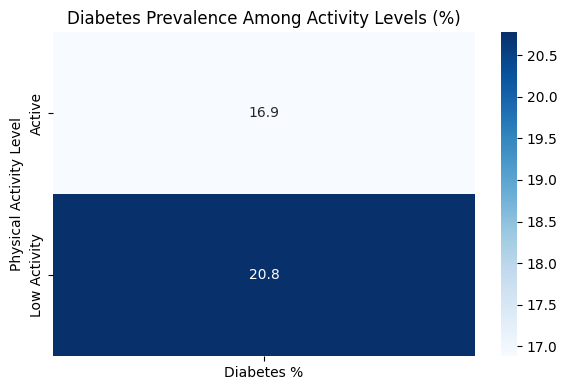

In [20]:
#Filter only physical activity responses
df_pa = df[df["Physical_Activity"].isin([1, 2])].copy()

# Map numeric code → value label
pa_labels = {
    1: "Active",
    2: "Low Activity"
}

# Create a labeled column
df_pa["PA_Label"] = df_pa["Physical_Activity"].map(pa_labels)

#Compute % diabetic for each activity level
heatmap_data = (
    df_pa.groupby("PA_Label")["Diabetes_Status"]
          .apply(lambda x: (x == 1).mean() * 100)
          .to_frame(name="Diabetes %")
)


plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".1f")

plt.title("Diabetes Prevalence Among Activity Levels (%)")
plt.ylabel("Physical Activity Level")
plt.xlabel("")
plt.tight_layout()
plt.show()


The visualization highlights the difference in diabetes prevalence between individuals with low physical activity and those who engage in regular physical activity. Individuals reporting low activity levels exhibit a noticeably higher percentage of diabetes cases (20.8%), whereas those who are physically active show a lower prevalence (16.9%). Although the chart only compares two categories, the contrast is substantial, reinforcing well-established evidence that physical inactivity is linked to increased metabolic risk.

***Smoking Status and Diabetes***


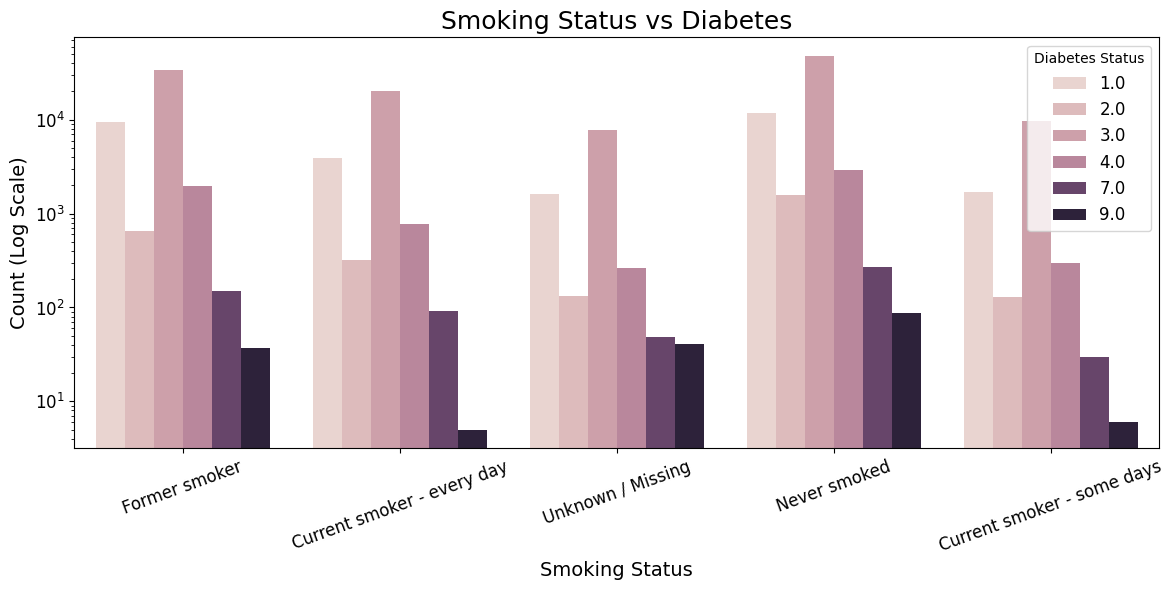

In [21]:
# Map numeric code → value label
smoke_map = {
    1: "Current smoker - every day",
    2: "Current smoker - some days",
    3: "Former smoker",
    4: "Never smoked",
    9: "Unknown / Missing"
}

# Create a labeled column
df["Smoking_Label"] = df["Smoking_Status"].map(smoke_map)

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Smoking_Label", hue="Diabetes_Status")

plt.yscale("log")

plt.title("Smoking Status vs Diabetes", fontsize=18)
plt.xlabel("Smoking Status", fontsize=14)
plt.ylabel("Count (Log Scale)", fontsize=14)

plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Diabetes Status", fontsize=12)
plt.tight_layout()
plt.show()


Former smokers and current everyday smokers show a noticeably higher count of diabetes diagnoses (Status = 1) compared to individuals who never smoked. Although “Never smoked” is the largest overall group, the proportion of diabetes among former and current smokers is visibly elevated. Prediabetes (Status = 4) follows the same pattern—occurring more frequently in groups with a history of smoking. In contrast, individuals who smoke only on some days or have missing/unknown smoking data show lower diabetes counts, likely reflecting smaller group sizes. These patterns support known health trends linking smoking behavior with increased metabolic and cardiovascular risk, suggesting that smoking status is a meaningful predictor in the diabetes risk classification task.

***Percentage of smokers who are diabetic***

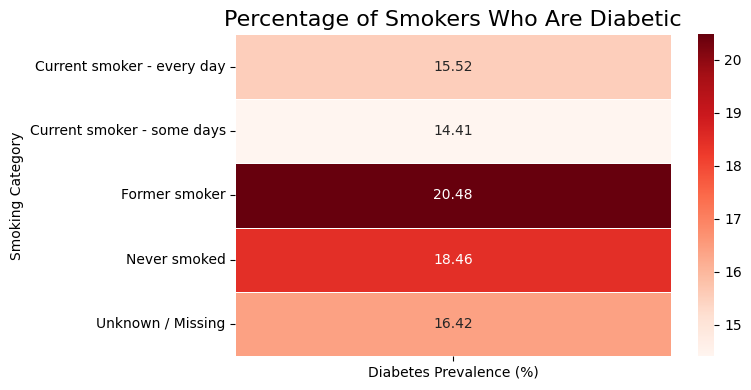

In [22]:
smoke_rate = (
    df.groupby("Smoking_Label")["Diabetes_Status"]
      .apply(lambda x: (x == 1).mean() * 100)
      .to_frame(name="Diabetes Prevalence (%)")
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    smoke_rate,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    linewidths=.5,
    cbar=True
)

plt.title("Percentage of Smokers Who Are Diabetic", fontsize=16)
plt.xlabel("")
plt.ylabel("Smoking Category")
plt.tight_layout()
plt.show()


This visualization highlights how smoking behavior relates to diabetes prevalence across five smoking categories. While current smokers (“every day” and “some days”) show moderate diabetes rates (14–16%), the strongest signal emerges among former smokers, who exhibit the highest prevalence at 20.48%. This pattern is consistent with clinical research: individuals often quit smoking after developing chronic health conditions, including diabetes, which elevates the proportion of former smokers who are diabetic.

People who have never smoked still show a relatively elevated prevalence (~18.46%), underscoring that smoking is just one of many risk factors contributing to diabetes. The “Unknown/Missing” group falls in the mid-range, suggesting no special deviation from the broader trend.

Overall, the chart illustrates that smoking history carries meaningful predictive value, with former smoking status serving as the strongest indicator of elevated metabolic risk. While active smoking shows a weaker direct association.

***Heavy Drinking vs Diabetes***


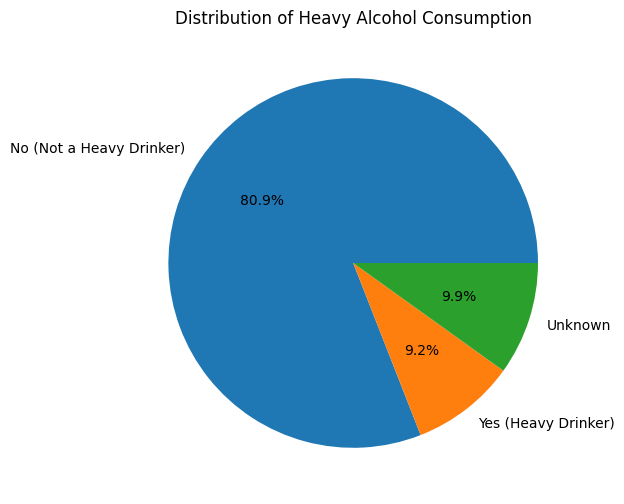

In [23]:
labels = ["No (Not a Heavy Drinker)", "Yes (Heavy Drinker)", "Unknown"]
sizes = df["Heavy_Alcohol_Consumption"].value_counts().sort_index()
sizes.index = labels

plt.figure(figsize=(6,6))
plt.pie(sizes, autopct='%1.1f%%', labels=labels)
plt.title("Distribution of Heavy Alcohol Consumption")
plt.show()


The distribution of heavy alcohol use in the dataset is highly imbalanced. A large majority of respondents (81%) report not being heavy drinkers, while only 9% classify as heavy drinkers. The remaining 10% fall into unknown or missing categories. This imbalance indicates that heavy drinking is relatively uncommon within the survey population. Because of this skew, heavy alcohol consumption may have limited predictive power on its own when modeling diabetes, but it remains worth including as a feature due to its known associations with metabolic and cardiovascular health. The imbalance also suggests that any predictive modeling involving this variable may require techniques such as class weighting or careful interpretation to avoid misleading conclusions.

## **Health Status & Medical Conditions**

***General Health vs Diabetes***


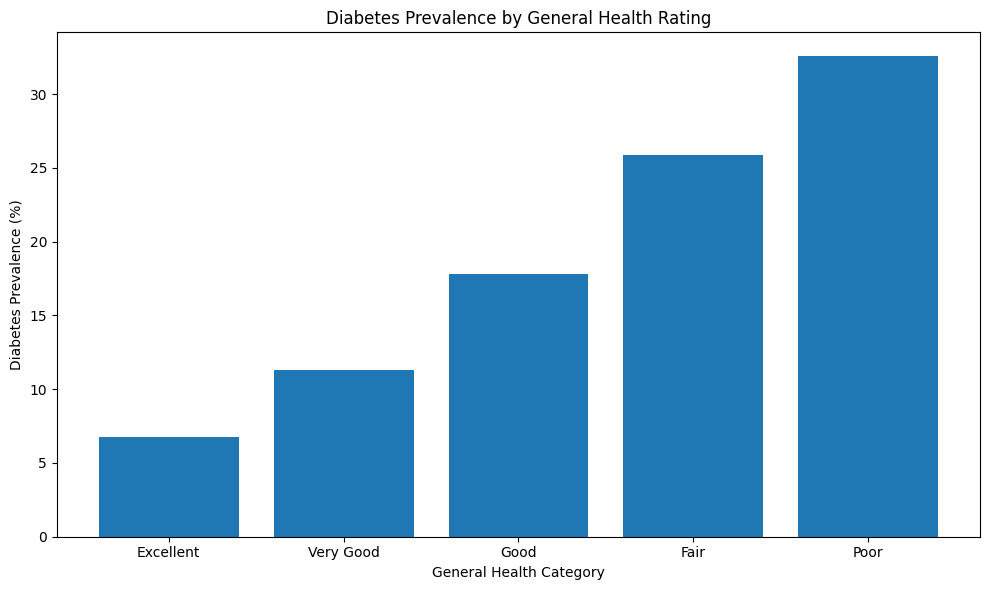

In [24]:
# Compute diabetes rate per health category
gh_rate = (
    df.groupby("General_Health")["Diabetes_Status"]
      .apply(lambda x: (x == 1).mean())
      .loc[[1,2,3,4,5]]
)

# Map category numbers → labels
labels = ["Excellent", "Very Good", "Good", "Fair", "Poor"]

plt.figure(figsize=(10,6))
plt.bar(labels, gh_rate * 100)

plt.title("Diabetes Prevalence by General Health Rating")
plt.xlabel("General Health Category")
plt.ylabel("Diabetes Prevalence (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



This visualization shows a strong negative relationship between self-reported general health and diabetes prevalence. Individuals who rate their health as Excellent have the lowest diabetes rate (7%), while those reporting Poor health show a dramatically higher prevalence (33%). The trend is highly linear: as perceived health decreases from Very Good → Good → Fair → Poor, diabetes prevalence consistently rises. This suggests that overall self-assessed health is a meaningful proxy for underlying metabolic risk and may serve as a valuable predictor in diabetes classification models.


***High Blood Pressure & Diabetes***


<Figure size 1200x600 with 0 Axes>

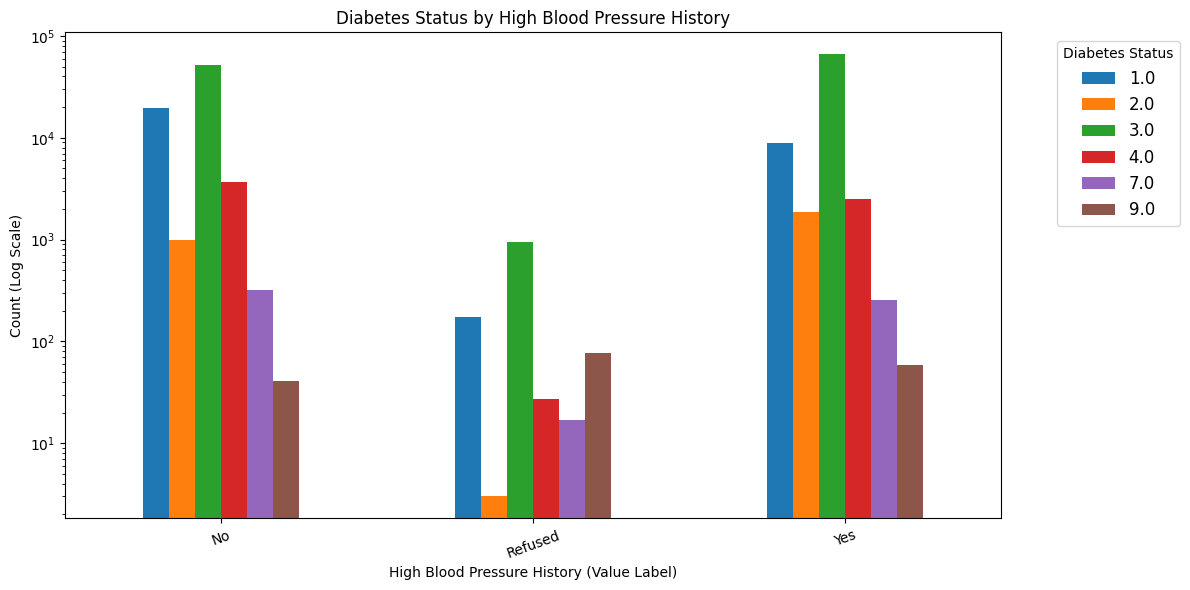

In [25]:
# Map numeric code → value label
bp_labels = {
    1: "Yes",
    2: "No",
    7: "Don't Know",
    9: "Refused"
}

df["BP_Label"] = df["High_BP_Diagnosis"].map(bp_labels)

bp_counts = df.groupby(["BP_Label", "Diabetes_Status"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
ax = bp_counts.plot(kind="bar", logy=True, figsize=(12,6))

plt.title("Diabetes Status by High Blood Pressure History")
plt.xlabel("High Blood Pressure History (Value Label)")
plt.ylabel("Count (Log Scale)")
plt.xticks(rotation=20)

# Move legend
plt.legend(
    title="Diabetes Status",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12
)

plt.tight_layout()
plt.show()





Across all categories, individuals without diabetes (Status = 3) remain the most prevalent; however, a distinct pattern emerges among those diagnosed with diabetes (Status = 1). Respondents who report having high blood pressure show markedly higher counts of diabetes compared with those with no history of hypertension. The “Refused” category is minimal and does not materially impact the interpretation.

***Cholesterol Levels vs Diabetes***



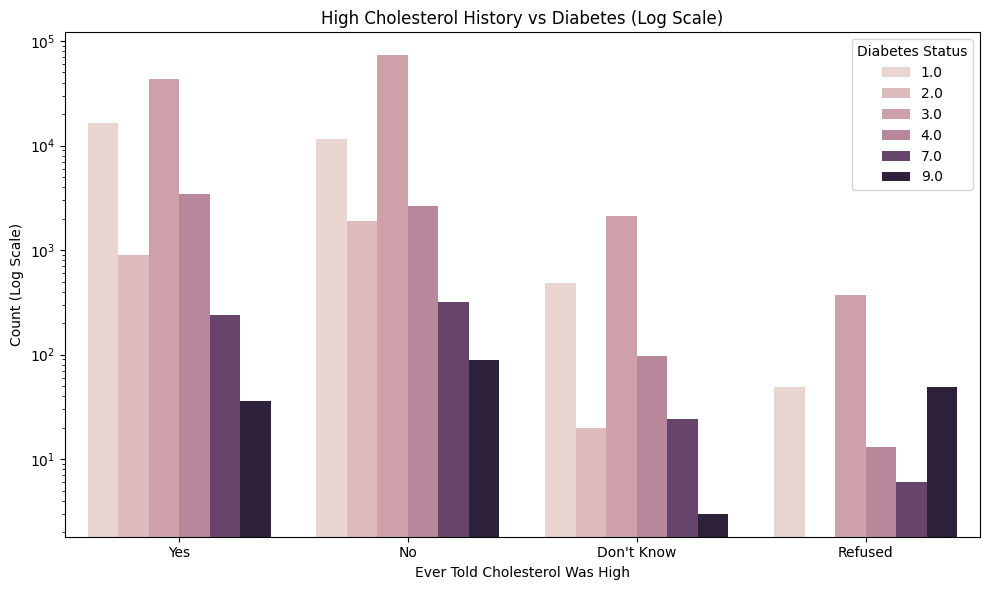

In [26]:
# Map numeric code → value label
cholesterol_labels = {
    1: "Yes",
    2: "No",
    7: "Don't Know",
    9: "Refused"
}

# Create a labeled column
df["Cholesterol_Label"] = df["Ever_High_Cholesterol"].map(cholesterol_labels)


plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="Cholesterol_Label",
    hue="Diabetes_Status",
    order=["Yes", "No", "Don't Know", "Refused"]
)

plt.yscale("log")

plt.title("High Cholesterol History vs Diabetes (Log Scale)")
plt.xlabel("Ever Told Cholesterol Was High")
plt.ylabel("Count (Log Scale)")
plt.legend(title="Diabetes Status")
plt.tight_layout()
plt.show()


Individuals who have been told they have high cholesterol exhibit higher counts of diabetes (Status = 1) compared with those without a history of elevated cholesterol. While the non-diabetic group (Status = 3) remains the largest overall. The “Yes” cholesterol group shows a higher proportion of diabetes cases. The “Don’t Know” and “Refused” categories are small and contribute limited analytical value but are retained for completeness.

***Blood Pressure Medication Use***


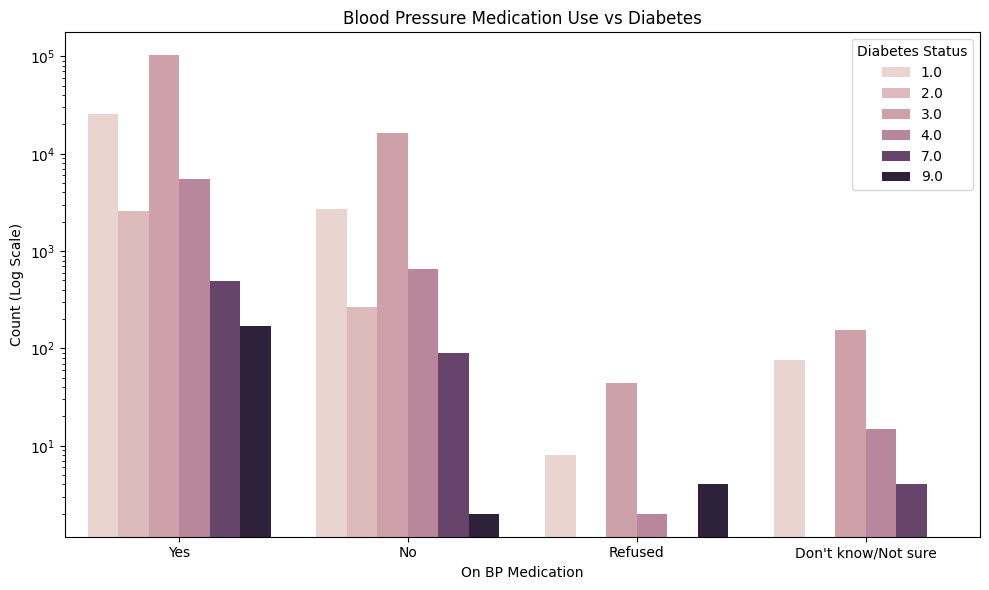

In [27]:
# Map numeric code → value label
bp_map = {
    1: "Yes",
    2: "No",
    7: "Don't know/Not sure",
    9: "Refused"
}

# Create a labeled column
df["On_BP_Medication_Label"] = df["On_BP_Medication"].map(bp_map)

plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x="On_BP_Medication_Label",
              hue="Diabetes_Status")

plt.title("Blood Pressure Medication Use vs Diabetes")
plt.xlabel("On BP Medication")
plt.ylabel("Count (Log Scale)")
plt.yscale("log")
plt.legend(title="Diabetes Status")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



This visualization reveals a relationship between blood pressure treatment and diabetes prevalence. While the non-diabetic population (status = 3) naturally dominates due to the size of the dataset, individuals taking blood pressure medication (“Yes”) show a noticeably higher representation of diabetes cases (status = 1) compared to those not on medication. The “Refused” and “Don’t know” categories are very small and have minimal analytical impact.

Individuals on BP medication are significantly more likely to have diabetes. Elevated blood pressure often co-occurs with insulin resistance and other cardiometabolic risk factors, making it a meaningful predictor in diabetes modeling. In contrast, those reporting no BP medication use show far fewer diabetes cases, reinforcing the association.


***Correlation Heatmap***

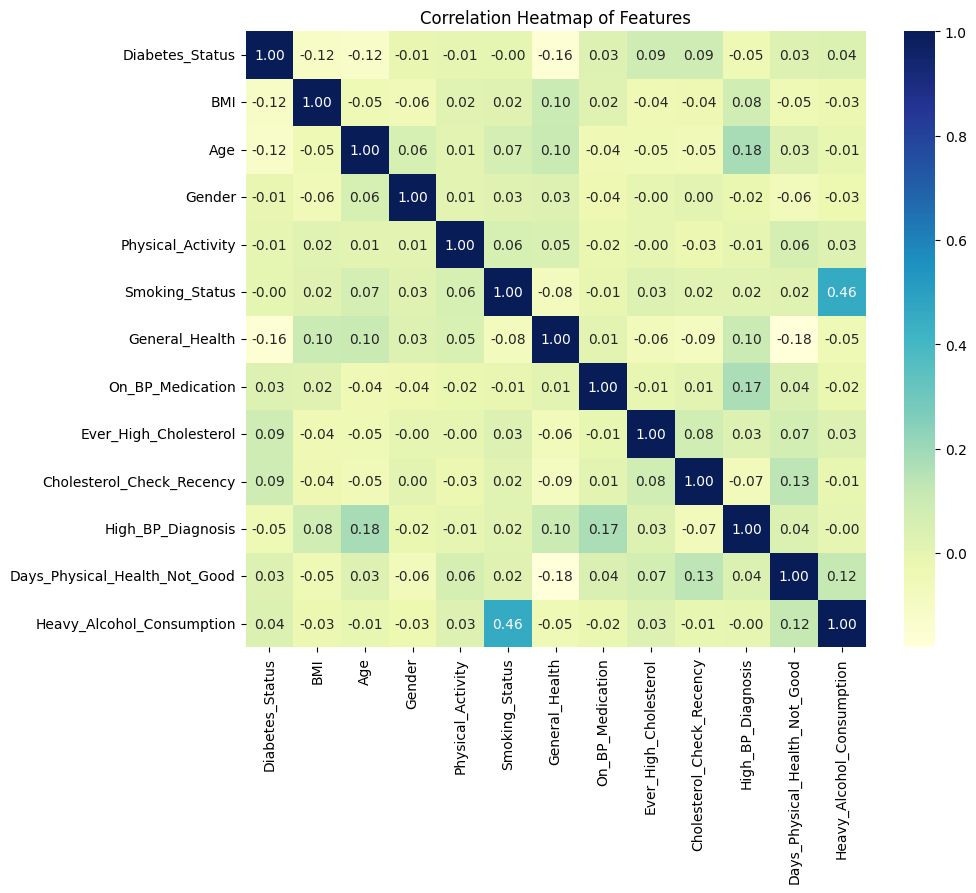

In [28]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


This heatmap provides an overview of relationships among key numeric health and behavioral variables in the dataset, including BMI, age, general health, cholesterol history, high blood pressure diagnosis, smoking status, and more. As expected in large public-health survey data, most correlations are relatively weak, indicating that no single variable alone strongly predicts diabetes status. Notable patterns include: a mild negative correlation between diabetes status and general health (−0.16), reflecting that poorer self-reported health aligns with higher likelihood of diabetes; a small positive association between age and high blood pressure diagnosis (0.18); and a moderate correlation between smoking status and heavy alcohol consumption (0.46), suggesting clustering of behavioral risk factors.

***Strongest Correlation Heatmap with Diabetes***

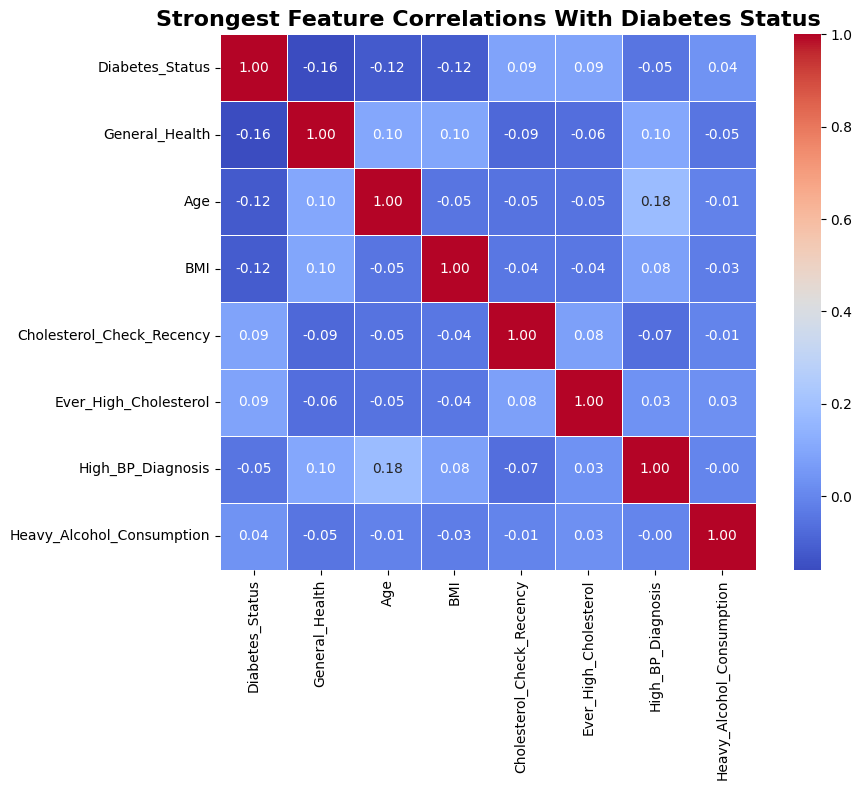

In [29]:


# Compute correlations with target variable
corr_target = df.corr(numeric_only=True)['Diabetes_Status'].sort_values(ascending=False)

# Select strongest correlations
top_features = corr_target.abs().sort_values(ascending=False).head(8).index.tolist()

df_top = df[top_features]

corr_matrix = df_top.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    square=True
)

plt.title("Strongest Feature Correlations With Diabetes Status", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


This heatmap highlights the features most closely associated with Diabetes:

- General Health shows the strongest negative correlation (-0.16), reinforcing that poorer self-rated health aligns with higher diabetes prevalence.

- Age and BMI both show moderate negative correlations (-0.12) with diabetes status. While not strong individually, these trends confirm that older age and higher BMI remain important contributors to diabetes risk.

- Cholesterol and blood pressure related variables show small but consistent positive correlations, reflecting the metabolic clustering often seen in individuals with diabetes.

- Heavy Alcohol Consumption shows almost no correlation, indicating that alcohol alone is not a direct predictor in this dataset.

Overall, the heatmap shows that while no single feature is strongly correlated with diabetes, several moderate contributors combine to form a meaningful risk profile. This suggests that diabetes prediction benefits from multi-feature modeling.

***Drop Non-Numeric Label Columns Before Machine Learning***


In [30]:
df = df.drop(columns=[
    "BMI_Label",
    "Gender_Label",
    "BP_Label",
    "Cholesterol_Label",
    "On_BP_Medication_Label",
    "Age_Label",
    "Smoking_Label"
], errors="ignore")

df.head()


,Diabetes_Status,BMI,Age,Gender,Physical_Activity,Smoking_Status,General_Health,On_BP_Medication,Ever_High_Cholesterol,Cholesterol_Check_Recency,High_BP_Diagnosis,Days_Physical_Health_Not_Good,Heavy_Alcohol_Consumption
0,3.0,4.0,9.0,2.0,2.0,3.0,5.0,1.0,1.0,1.0,2.0,15.0,1.0
1,3.0,3.0,7.0,2.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,88.0,1.0
2,3.0,2.0,11.0,2.0,1.0,9.0,4.0,1.0,1.0,1.0,1.0,15.0,9.0
3,3.0,3.0,9.0,2.0,2.0,4.0,5.0,1.0,1.0,1.0,2.0,30.0,1.0
4,3.0,2.0,9.0,2.0,2.0,4.0,5.0,1.0,2.0,1.0,1.0,20.0,1.0


#**Machine learning Models**

***CatBoost, Random Forest, Logistic Regression***


In [31]:
!pip install catboost

# CatBoost
from catboost import CatBoostClassifier

# Features & Target
X = df.drop("Diabetes_Status", axis=1)
y = df["Diabetes_Status"]

# One-hot encode (Opt)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=42, stratify=y
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [32]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function="MultiClass",
    verbose=0
)

cat_model.fit(X_train, y_train)

In [33]:
from imblearn.over_sampling import RandomOverSampler

from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE

# Oversample With ROS
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight=None,
    random_state=42
)

rf_model.fit(X_res, y_res)

# Logistic Regression

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train_scaled, y_train)


log_base = LogisticRegression(max_iter=500)
log_model = OneVsRestClassifier(log_base)

log_model.fit(X_sm, y_sm)



OneVsRestClassifier(estimator=LogisticRegression(max_iter=500))

The diabetes prediction models were trained using three different machine-learning approaches: CatBoost, Random Forest, and Logistic Regression. Each model provides unique strengths and helps us understand the predictive structure of the dataset.

CatBoost generally performs strongly on tabular datasets and automatically handles feature interactions and non-linear patterns. Its performance is expected to be among the best because it excels with categorical-style numeric codes, even without extensive preprocessing.

Random Forest also performs well for this type of data by combining multiple decision trees to reduce overfitting and improve stability. It is effective for capturing feature importance and non-linear relationships, though it may not achieve the same level of precision as gradient boosting models.

Logistic Regression serves as a baseline model. Since it assumes linear relationships between predictors and the target, its performance is typically lower than tree-based models. Scaling is required for this model to ensure equal contribution from each feature.

To address the strong class imbalance in the BRFSS diabetes dataset, two oversampling techniques were used:RandomOverSampler (ROS) for models: Random Forest and CatBoost and SMOTE (Synthetic Minority Oversampling Technique) for Logistic Regression. These methods ensure the models receive more balanced training data and improve recall for minority diabetes classes.

# **Evaluation**


==================== CatBoost ====================
AUC Micro:    0.9586
AUC Macro:    0.7812
AUC Weighted: 0.7715

Classification Report:
              precision    recall  f1-score   support

         1.0       0.44      0.15      0.23      7145
         2.0       0.31      0.02      0.03       708
         3.0       0.78      0.96      0.86     29782
         4.0       0.17      0.00      0.00      1554
         7.0       0.00      0.00      0.00       148
         9.0       0.33      0.02      0.04        44

    accuracy                           0.76     39381
   macro avg       0.34      0.19      0.19     39381
weighted avg       0.68      0.76      0.69     39381



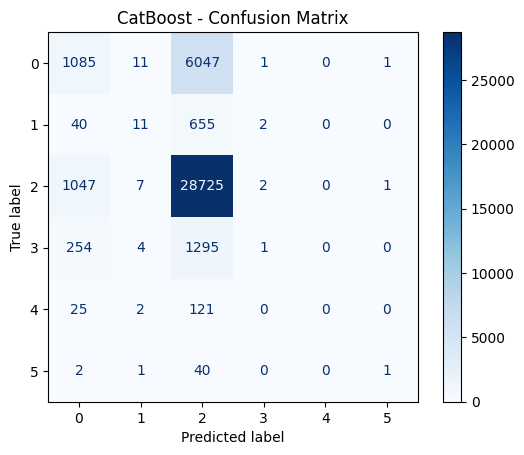

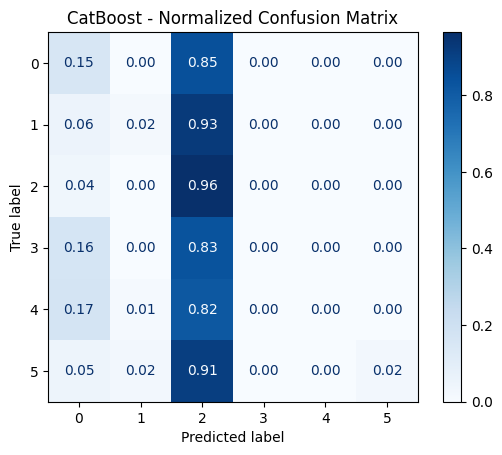


==================== Random Forest ====================
AUC Micro:    0.8625
AUC Macro:    0.6055
AUC Weighted: 0.5959

Classification Report:
              precision    recall  f1-score   support

         1.0       0.20      0.20      0.20      7145
         2.0       0.02      0.02      0.02       708
         3.0       0.78      0.77      0.78     29782
         4.0       0.01      0.01      0.01      1554
         7.0       0.00      0.00      0.00       148
         9.0       0.07      0.07      0.07        44

    accuracy                           0.62     39381
   macro avg       0.18      0.18      0.18     39381
weighted avg       0.63      0.62      0.62     39381



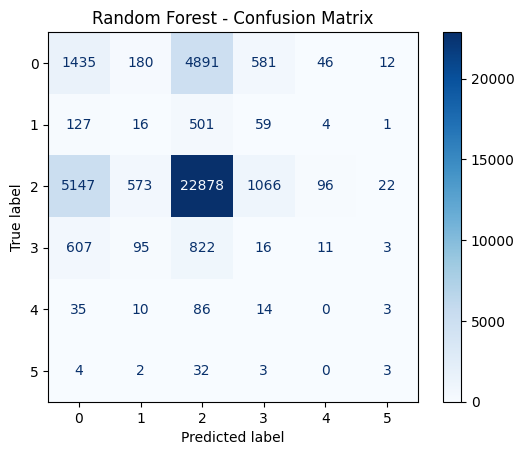

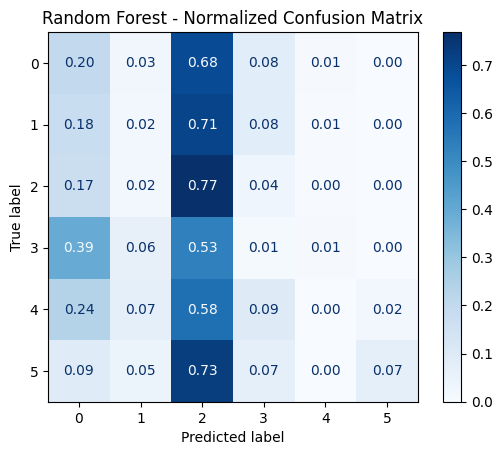


==================== Logistic Regression ====================
AUC Micro:    0.7159
AUC Macro:    0.7278
AUC Weighted: 0.6991

Classification Report:
              precision    recall  f1-score   support

         1.0       0.35      0.41      0.38      7145
         2.0       0.05      0.77      0.09       708
         3.0       0.88      0.30      0.45     29782
         4.0       0.09      0.14      0.11      1554
         7.0       0.01      0.19      0.01       148
         9.0       0.01      0.64      0.02        44

    accuracy                           0.32     39381
   macro avg       0.23      0.41      0.18     39381
weighted avg       0.74      0.32      0.41     39381



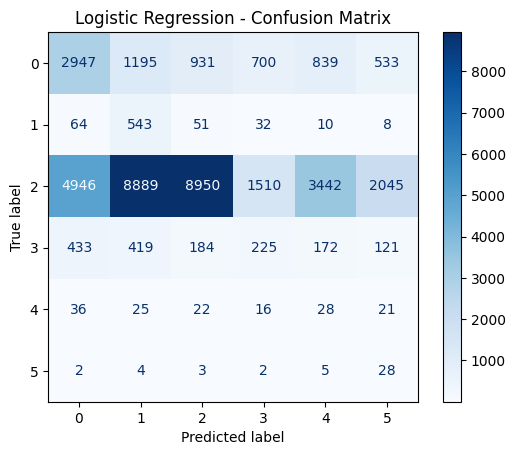

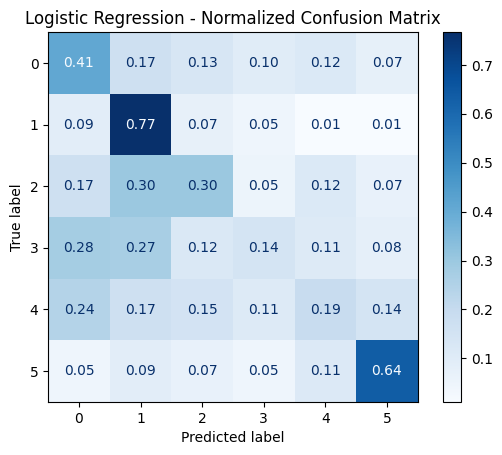


===== Model Comparsion =====
                 Model  AUC_Micro  AUC_Macro  AUC_Weighted
0             CatBoost   0.958575   0.781232      0.771512
1        Random Forest   0.862456   0.605485      0.595929
2  Logistic Regression   0.715913   0.727768      0.699094


,Model,AUC_Micro,AUC_Macro,AUC_Weighted
0,CatBoost,0.958575,0.781232,0.771512
1,Random Forest,0.862456,0.605485,0.595929
2,Logistic Regression,0.715913,0.727768,0.699094


In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name):

    print(f"\n==================== {model_name} ====================")

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Multiclass AUC
    auc_micro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="micro")
    auc_macro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    auc_weighted = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")

    print(f"AUC Micro:    {auc_micro:.4f}")
    print(f"AUC Macro:    {auc_macro:.4f}")
    print(f"AUC Weighted: {auc_weighted:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap="Blues", values_format="d")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # Normalized Confusion Matrix
    cm_norm = confusion_matrix(y_test, y_pred, normalize="true")
    ConfusionMatrixDisplay(cm_norm).plot(cmap="Blues", values_format=".2f")
    plt.title(f"{model_name} - Normalized Confusion Matrix")
    plt.show()

    return {
        "Model": model_name,
        "AUC_Micro": auc_micro,
        "AUC_Macro": auc_macro,
        "AUC_Weighted": auc_weighted
    }

# Evaluation
results = []

results.append(evaluate_model(cat_model, X_test, y_test, "CatBoost"))
results.append(evaluate_model(rf_model, X_test, y_test, "Random Forest"))
results.append(evaluate_model(log_model, X_test_scaled, y_test, "Logistic Regression"))

# Model Comparison
comparison_df = pd.DataFrame(results)

print("\n===== Model Comparsion =====")
print(comparison_df)

comparison_df


**CatBoost**

- CatBoost delivers the strongest overall performance. It achieves the highest AUC Micro (0.9586), showing excellent ability to distinguish classes across all samples.
- AUC Macro (0.7812) and AUC Weighted (0.7715) also outperform the other models, suggesting good balance despite class imbalance.
- Classification results show high accuracy on the majority class (Status 3), but performance drops sharply on minority classes common in imbalanced datasets.
- (Note): SMOTE improved minority recall but significantly reduced overall performance. CatBoost performed best on the unbalanced dataset without SMOTE. Thus, for the final model, the non-SMOTE CatBoost results were used

**Random Forest**
- Random Forest performs moderately well but falls noticeably behind CatBoost.
- AUC Micro of 0.863, classifies many samples correctly. However, Macro (0.605) and Weighted AUC (0.596) drop significantly, indicating the model struggles with underrepresented classes.
- The classification report shows strong recall for the majority class (Class 3 at 77%) but poor to no performance on minority classes.
- Random Forest’s bias toward the dominant class.

**Logistic Regression**
- Logistic Regression produced the lowest AUC Micro (0.716) but decent AUC Macro (0.728).
- Recall for rare classes - Class 2 Recall reaches 77%
- Overall accuracy drops significantly, and the model becomes unstable on the majority class (Class 3 Recall falls to ~30%). Minority classes show improved recall but very poor precision, meaning many false positives.

***Roc Curves***

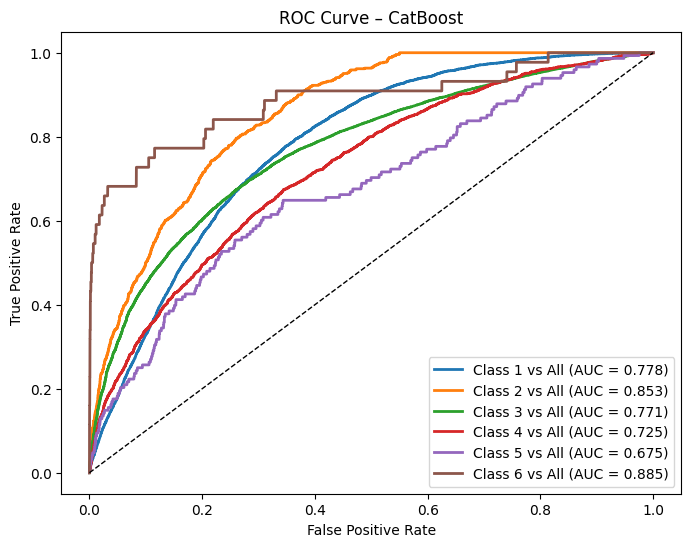

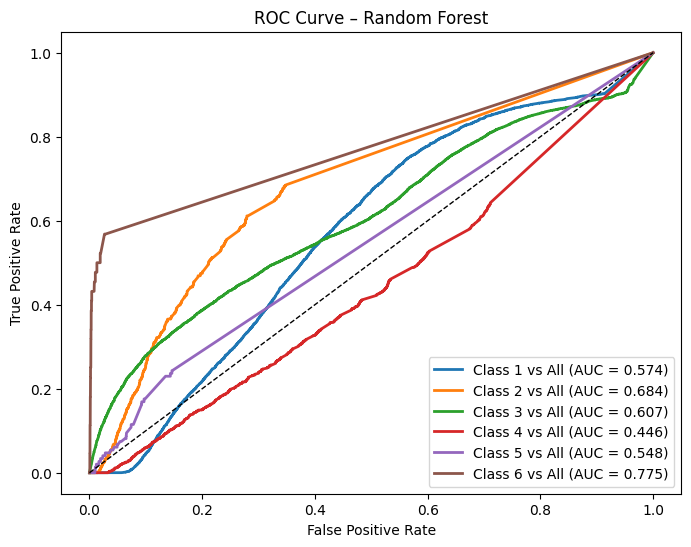

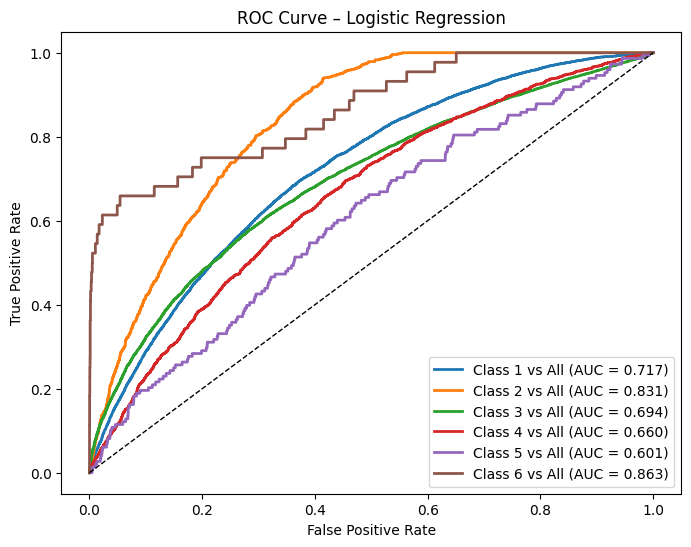

In [35]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)
    n_classes = y_score.shape[1]

    # Binarize labels for one-vs-rest ROC curves
    from sklearn.preprocessing import label_binarize
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    plt.figure(figsize=(8,6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)

        plt.plot(
            fpr,
            tpr,
            lw=2,
            label=f"Class {i+1} vs All (AUC = {roc_auc:.3f})"
        )

    plt.plot([0, 1], [0, 1], "k--", lw=1)
    plt.title(f"ROC Curve – {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()


# Run models
plot_multiclass_roc(cat_model, X_test, y_test, "CatBoost")
plot_multiclass_roc(rf_model, X_test, y_test, "Random Forest")
plot_multiclass_roc(log_model, X_test_scaled, y_test, "Logistic Regression")



***Feature Importance***

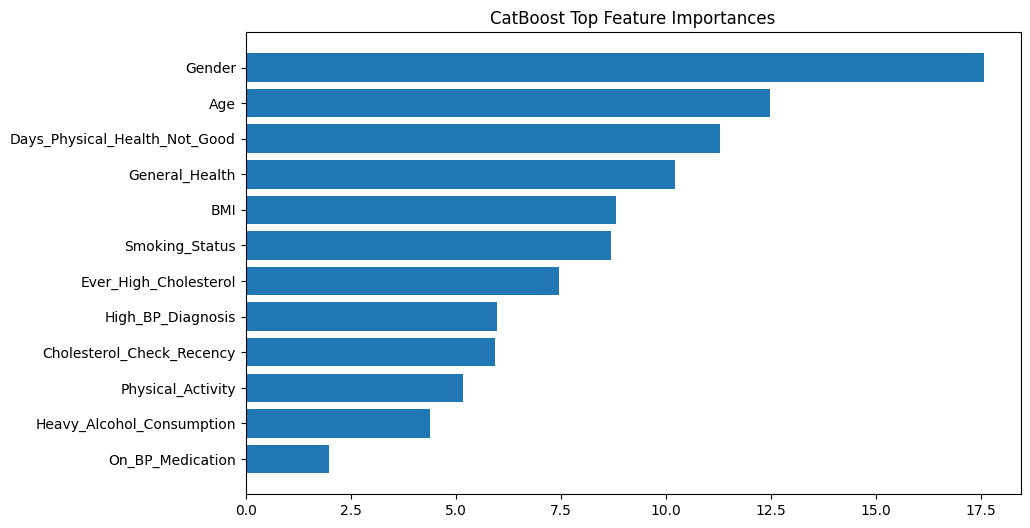

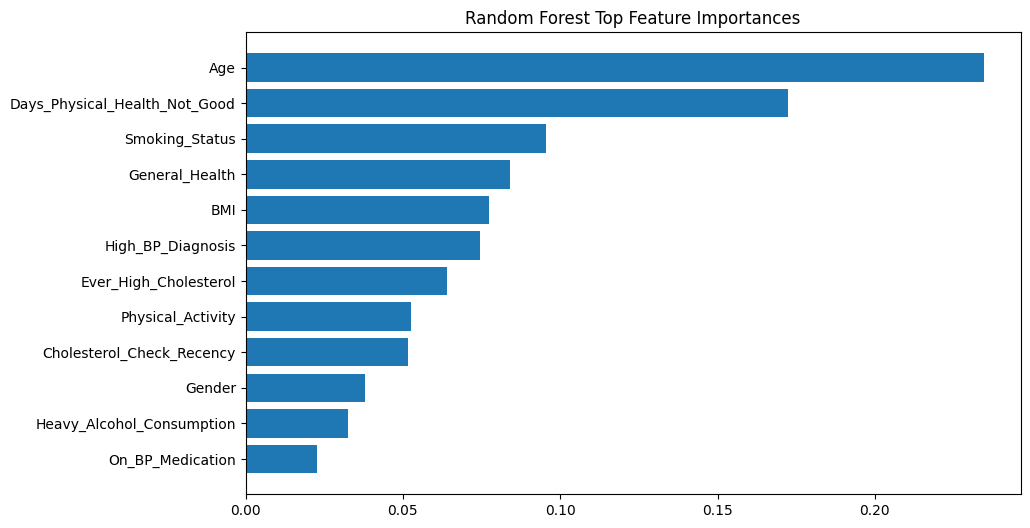

In [36]:
# CatBoost
plt.figure(figsize=(10, 6))
importances = cat_model.get_feature_importance()
feat_names = X_encoded.columns

sorted_idx = np.argsort(importances)[-20:]
plt.barh(feat_names[sorted_idx], importances[sorted_idx])
plt.title("CatBoost Top Feature Importances")
plt.show()

# Random Forest
plt.figure(figsize=(10, 6))
rf_imp = rf_model.feature_importances_
sorted_idx = np.argsort(rf_imp)[-20:]
plt.barh(feat_names[sorted_idx], rf_imp[sorted_idx])
plt.title("Random Forest Top Feature Importances")
plt.show()